## PREDICTIVE ANALYTICS MSBA 6420 Homework#4

### Shao-Ning Yen

### 1)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os, re
import numpy as np
import scipy as sp
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

seed = 15000

#### a.

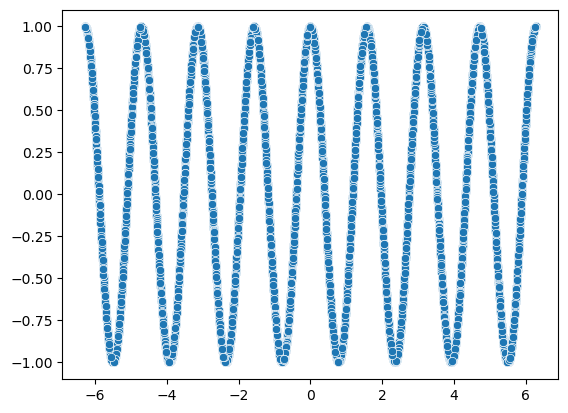

In [15]:
sample = np.random.uniform(-2*np.pi, 2*np.pi, 120000)
def func(x):
    return 2 *(2*np.cos(x)**2 - 1)**2-1
y = func(sample)
sns.scatterplot(sample, y)
X_train, X_test, y_train, y_test = train_test_split(sample, y, test_size=0.5, random_state=42)

#### b.

In [16]:
hidden_layer_1 = [24, 48, 72, 128, 256]
trainable_param_1 = []
test_score_1 = []

for i in hidden_layer_1:
    model1 = Sequential()
    model1.add(Dense(i, input_dim=1, activation='relu'))
    model1.add(Dense(1))

    model1.compile(loss='mse', optimizer=SGD(momentum=0.9, learning_rate=1e-4)) 
    model1.fit(X_train, y_train, epochs=2000, batch_size=3000, verbose=0)
    result1 = model1.evaluate(X_test, y_test)

    trainable_param_1.append(model1.count_params())
    test_score_1.append(np.sqrt(result1))

print('Hidden Layer:', hidden_layer_1)
print('Trainable Parameters 1:', trainable_param_1)
print('Test Score 1:', test_score_1)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4874
Hidden Layer: [24, 48, 72, 128, 256]
Trainable Parameters 1: [73, 145, 217, 385, 769]
Test Score 1: [0.7013341986754498, 0.7008211539144213, 0.7014300155437488, 0.6991534282497971, 0.6981486224461361]


In [27]:
hidden_layer_2 = [12, 24, 36]
trainable_param_2 = []
test_score_2 = []

for i in hidden_layer_2:
    model2 = Sequential()
    model2.add(Dense(i, input_dim=1, activation='relu'))
    model2.add(BatchNormalization())
    model2.add(Dense(i, input_dim=1, activation='relu'))
    model2.add(Dense(1))

    model2.compile(loss='mse', optimizer=SGD(momentum=0.9, learning_rate=1e-4)) 
    model2.fit(X_train, y_train, epochs=2000, batch_size=3000, verbose=0)
    result2 = model2.evaluate(X_test, y_test)

    trainable_param_2.append(model2.count_params())
    test_score_2.append(np.sqrt(result2))

print('Hidden Layer:', hidden_layer_2)
print('Trainable Parameters 2:', trainable_param_2)
print('Test Score 2:', test_score_2)

1875/1875 [==============================] - 2s 813us/step - loss: 0.2969
Hidden Layer: [12, 24, 36]
Trainable Parameters 2: [241, 769, 1585]
Test Score 2: [0.680133519773259, 0.5988187516705022, 0.5448983847090983]


In [19]:
hidden_layer_3 = [8, 16, 24]
trainable_param_3 = []
test_score_3 = []

for i in hidden_layer_3:
    model3 = Sequential()
    model3.add(Dense(i, input_dim=1, activation='relu'))
    model3.add(BatchNormalization())
    model3.add(Dense(i, input_dim=1, activation='relu'))
    model3.add(BatchNormalization())
    model3.add(Dense(i, input_dim=1, activation='relu'))
    model3.add(Dense(1))

    model3.compile(loss='mse', optimizer=SGD(momentum=0.9, learning_rate=1e-4)) 
    model3.fit(X_train, y_train, epochs=2000, batch_size=3000, verbose=0)
    result3 = model3.evaluate(X_test, y_test)

    trainable_param_3.append(model3.count_params())
    test_score_3.append(np.sqrt(result3))

print('Hidden Layer:', hidden_layer_3)
print('Trainable Parameters 3:', trainable_param_3)
print('Test Score 3:', test_score_3)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0108
Hidden Layer: [8, 16, 24]
Trainable Parameters 3: [233, 721, 1465]
Test Score 3: [0.5724510699605759, 0.23702374849412533, 0.10383758768026531]


#### c.

In [28]:
units = pd.DataFrame(hidden_layer_1, columns=['Number of Units'])
trainable_param1 = pd.DataFrame(trainable_param_1, columns=['Number of Parameters'])
trainable_param2 = pd.DataFrame(trainable_param_2, columns=['Number of Parameters'])
trainable_param3 = pd.DataFrame(trainable_param_3, columns=['Number of Parameters'])
test_score1 = pd.DataFrame(test_score_1, columns=['Test Error'])
test_score2 = pd.DataFrame(test_score_2, columns=['Test Error'])
test_score3 = pd.DataFrame(test_score_3, columns=['Test Error'])
model1 = pd.concat([units, trainable_param1, test_score1], axis=1)
model2 = pd.concat([units, trainable_param2, test_score2], axis=1)
model3 = pd.concat([units, trainable_param3, test_score3], axis=1)

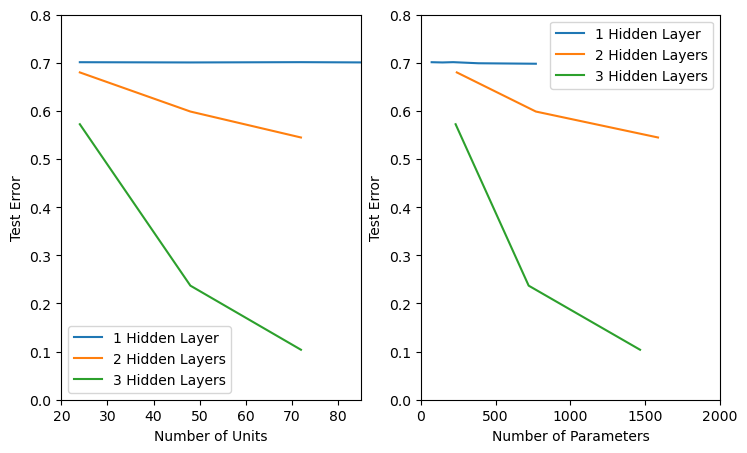

In [29]:
plt.figure(figsize=(8.5, 5))
plt.subplot(121)
sns.lineplot(x='Number of Units', y='Test Error', data=model1)
sns.lineplot(x='Number of Units', y='Test Error', data=model2)
sns.lineplot(x='Number of Units', y='Test Error', data=model3)
plt.xlim(20, 85)
plt.ylim(0, 0.8)
plt.legend(['1 Hidden Layer', '2 Hidden Layers', '3 Hidden Layers'])

plt.subplot(122)
sns.lineplot(x='Number of Parameters', y='Test Error', data=model1)
sns.lineplot(x='Number of Parameters', y='Test Error', data=model2)
sns.lineplot(x='Number of Parameters', y='Test Error', data=model3)
plt.xlim(0, 2000)
plt.ylim(0, 0.8)
plt.legend(['1 Hidden Layer', '2 Hidden Layers', '3 Hidden Layers'])

### 2)

### Unzip Data File

In [3]:
import zipfile
import os

train_zip = 'G:/My Drive/2022 fall/6421 Predictive Analytics/HW/hw4/train.zip/'
test_zip = 'G:/My Drive/2022 fall/6421 Predictive Analytics/HW/hw4/test.zip/'

with zipfile.ZipFile(train_zip, 'r') as z:
    z.extractall()

with zipfile.ZipFile(test_zip, 'r') as z:
    z.extractall()
    z.close()

In [5]:
train = 'G:/My Drive/2022 fall/6421 Predictive Analytics/HW/hw4/train/'
test = 'G:/My Drive/2022 fall/6421 Predictive Analytics/HW/hw4/test/'

train_images = [train+i for i in os.listdir(train)] 
test_images =  [test+i for i in os.listdir(test)]

print('Total training images:', len(train_images))
print('Total testing images:', len(test_images))

Total training images: 25000
Total testing images: 12500


### Sort the Image so that it won't cause error in prediction

In [6]:
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]


# sort the images
train_images.sort(key=natural_keys)
test_images.sort(key=natural_keys)

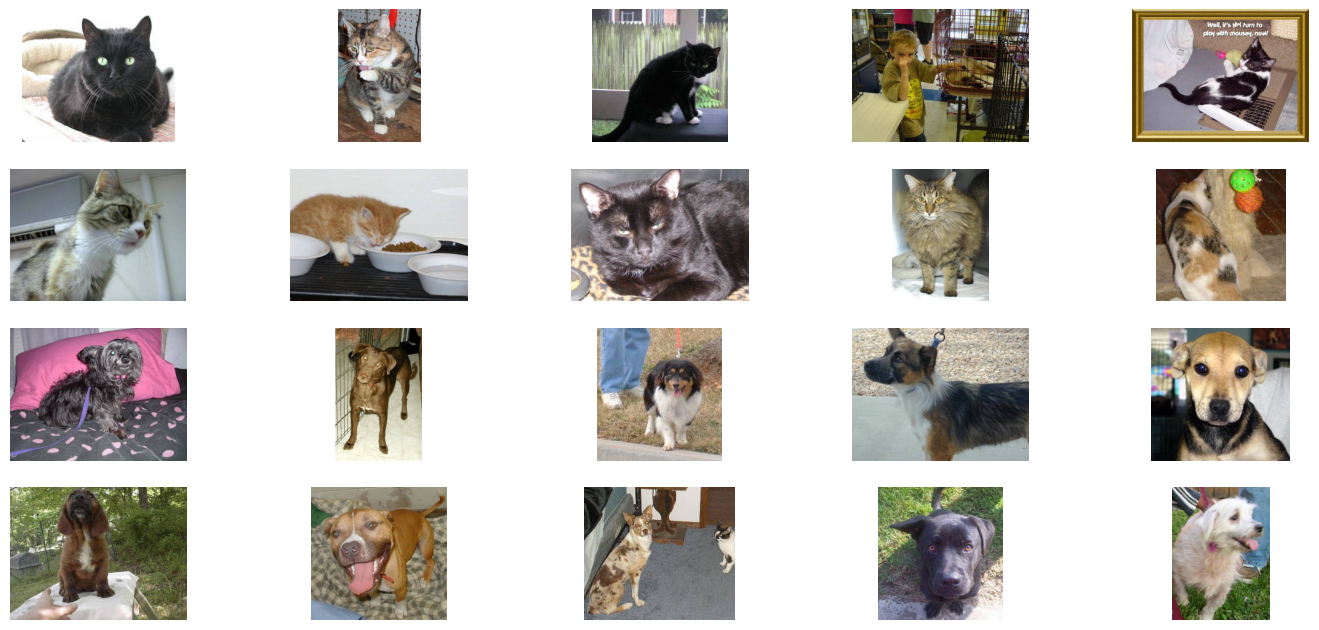

In [7]:
nrows = 5
ncols = 5
pic_index = 12510

fig = plt.gcf()
fig.set_size_inches(ncols*3.5, nrows*2)
next_pix = train_images[pic_index-20:pic_index] 

for i, img_path in enumerate(next_pix):

  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
label = []
for i in train_images:
    if 'cat' in i:
        label.append(0)
    elif 'dog' in i:
        label.append(1)
train_df = pd.DataFrame({
    'filename': train_images,
    'class': label
})
train_df['class'] = train_df['class'].astype(str)
test_df = pd.DataFrame({'filename':test_images})

In [9]:
train, validate = train_test_split(train_df, test_size=0.2, stratify=train_df['class'], random_state=seed)

### Transfer Learning Model Setting

In [10]:
base_model = tf.keras.applications.EfficientNetV2B3(
    weights='imagenet',  
    input_shape=(224, 224, 3),
    classes=2,
    include_top=False
    )

base_model.trainable = False
inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-3),
              metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b3 (Function  (None, 7, 7, 1536)       12930622  
 al)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               786944    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                             

In [66]:
train_datagen = ImageDataGenerator(
    # rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(
    # rescale=1. / 255,
    fill_mode='nearest',
)

train_generator = train_datagen.flow_from_dataframe(
                                        dataframe=train,
                                        directory=None,
                                        target_size=(224, 224),
                                        batch_size=40,
                                        class_mode="binary",
                                        seed=seed,
                                        shuffle=True,
                                        )

validation_generator = validation_datagen.flow_from_dataframe(
                                        dataframe=validate,
                                        directory=None,
                                        target_size=(224, 224),
                                        batch_size=40,
                                        class_mode="binary",
                                        seed=seed,
                                        shuffle=True,
                                        )

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [67]:
epochs=20

# Define callbacks metric
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', mode='min', patience=2, factor= 0.5, min_lr= 1e-6, verbose=0),
    ModelCheckpoint('cat_dog_efnV2B3.h5', 
                    verbose=1, 
                    monitor='val_loss', 
                    save_best_only=True,
                    save_weights_only=True,
                    mode='min')  
]

# Train the model
history = model.fit(
    train_generator, 
    steps_per_epoch=train_generator.samples//40,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//40,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/20
500/500 [==============================] - ETA: 0s - loss: 0.0482 - accuracy: 0.9837
Epoch 1: val_loss improved from inf to 0.02446, saving model to cat_dog_efnV2B3.h5
500/500 [==============================] - 1269s 3s/step - loss: 0.0482 - accuracy: 0.9837 - val_loss: 0.0245 - val_accuracy: 0.9918 - lr: 0.0010
Epoch 2/20
500/500 [==============================] - ETA: 0s - loss: 0.0321 - accuracy: 0.9880
Epoch 2: val_loss improved from 0.02446 to 0.02340, saving model to cat_dog_efnV2B3.h5
500/500 [==============================] - 1256s 3s/step - loss: 0.0321 - accuracy: 0.9880 - val_loss: 0.0234 - val_accuracy: 0.9914 - lr: 0.0010
Epoch 3/20
500/500 [==============================] - ETA: 0s - loss: 0.0266 - accuracy: 0.9899
Epoch 3: val_loss did not improve from 0.02340
500/500 [==============================] - 1258s 3s/step - loss: 0.0266 - accuracy: 0.9899 - val_loss: 0.0236 - val_accuracy: 0.9910 - lr: 0.0010
Epoch 4/20
500/500 [==============================] - ETA

In [69]:
base_model = tf.keras.applications.EfficientNetV2B3(
    weights='imagenet',  
    input_shape=(224, 224, 3),
    classes=2,
    include_top=False
    )

base_model.trainable = False

inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

model.load_weights('cat_dog_efnV2B3.h5')

In [70]:
# Unfreeze the base model
model.layers[1].trainable = True

for layer in model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001ED964C2B30> True
<keras.engine.functional.Functional object at 0x000001ED96CF6680> True
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x000001ED96CA68F0> True
<keras.layers.core.dense.Dense object at 0x000001ED96CA51E0> True
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001ED96CA5A80> True
<keras.layers.core.activation.Activation object at 0x000001ED80C67640> True
<keras.layers.regularization.dropout.Dropout object at 0x000001ED82536080> True
<keras.layers.core.dense.Dense object at 0x000001ED824C22F0> True


In [71]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Low learning rate
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b3 (Function  (None, 7, 7, 1536)       12930622  
 al)                                                             
                                                                 
 global_average_pooling2d_13  (None, 1536)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_26 (Dense)            (None, 512)               786944    
                                                                 
 batch_normalization_13 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                          

In [86]:
epochs = 20

callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, mode='min', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', mode='min', patience=2, factor= 0.5, min_lr= 1e-6, verbose=1),
    ModelCheckpoint('cat_dog_efnV2B3.h5', 
                    verbose=1, 
                    monitor='val_loss', 
                    save_best_only=True,
                    save_weights_only=True,
                    mode='min')  
]

# Train the model
history = model.fit(
    train_generator, 
    steps_per_epoch=train_generator.samples//40,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//40,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/20
500/500 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 0.9974
Epoch 1: val_loss improved from inf to 0.01986, saving model to cat_dog_efnV2B3.h5
500/500 [==============================] - 2234s 4s/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0199 - val_accuracy: 0.9934 - lr: 5.0000e-06
Epoch 2/20
500/500 [==============================] - ETA: 0s - loss: 0.0061 - accuracy: 0.9980
Epoch 2: val_loss improved from 0.01986 to 0.01916, saving model to cat_dog_efnV2B3.h5
500/500 [==============================] - 4172s 8s/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0192 - val_accuracy: 0.9944 - lr: 5.0000e-06
Epoch 3/20
500/500 [==============================] - ETA: 0s - loss: 0.0053 - accuracy: 0.9987
Epoch 3: val_loss did not improve from 0.01916
500/500 [==============================] - 2279s 5s/step - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.0200 - val_accuracy: 0.9944 - lr: 5.0000e-06
Epoch 4/20
500/500 [=========================

In [87]:
test_datagen = ImageDataGenerator(
    # rescale=1./255
)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,
    shuffle=False)

Found 12500 validated image filenames.


In [88]:
test_pred_proba = model.predict(
    test_generator,
    steps=len(test_images),
    verbose=1)

test_pred_proba

12500/12500 [==============================] - 832s 67ms/step


array([[9.9994266e-01],
       [9.9965441e-01],
       [9.9989802e-01],
       ...,
       [9.9970996e-01],
       [9.9958277e-01],
       [6.4493379e-06]], dtype=float32)

In [89]:
df = pd.DataFrame(test_pred_proba, columns=['label'])
df['id'] = df.index + 1
df.drop_index = df['id'].astype(int)
cols = df.columns.to_list()
cols = cols[-1:] + cols[:-1]
df = df[cols]
df.to_csv('submission.csv', index=False)
df

,id,label
0,1,0.999943
1,2,0.999654
2,3,0.999898
3,4,0.999968
4,5,0.000004
...,...,...
12495,12496,0.000022
12496,12497,0.000005
12497,12498,0.999710
12498,12499,0.999583


### Result & Summary

![](2022-12-02-21-24-36.png)

In this problem on the Dog VS. Cat classification challenge, I use Transfer learning to achieve an accuracy of about 99%. I first train the whole model with the new binary-classifier head (that is, it predicts the probabilities of “dog” and “cat”) and then freeze the base model throughout training, which leads to 99% accuracy with a single training epoch. I built the transfer learning model by adding layers to the EfficientNetV2B3 model. The first layer is the base model and is pre-trained on the ImageNet dataset consisting of 1.4M images and 1000 classes, for which we freeze the weights by setting its trainable property to False, as in Keras. Then, we add a GlobalAveragePooling2D layer before the DenseBN layer (a fully connected layer followed by a Batch Normalization) and a relu activation function.